# Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

# Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss

import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Dataset Description

#The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
Attribute/Features Description:
Dataset have 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 predictor/independent attributes and 1 dependent attribute.

bank client attributes:
age: age of client (numeric)
job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
marital : marital status (categorical: "married", "divorced", "single")
education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")
default: has credit in default? (binary/2-categories: "yes", "no")
balance: average yearly balance, in euros (numeric)
housing: has housing loan? (binary/2-categories: "yes", "no")
loan: has personal loan? (binary/2-categories: "yes", "no")
related with the last contact of the current campaign:
contact: contact communication type (categorical: "unknown", "telephone", "cellular")
day: last contact day of the month (numeric)
month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
duration: last contact duration, in seconds (numeric)

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


# Data Cleaning

checking for all the null values in columns

In [5]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


# Observation:

Our dataset do not have any null/nan/missing values.

# Expolatory Data Analysis (EDA)

In [8]:
df.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
df.shape

(31647, 18)

In [10]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [11]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

<Axes: >

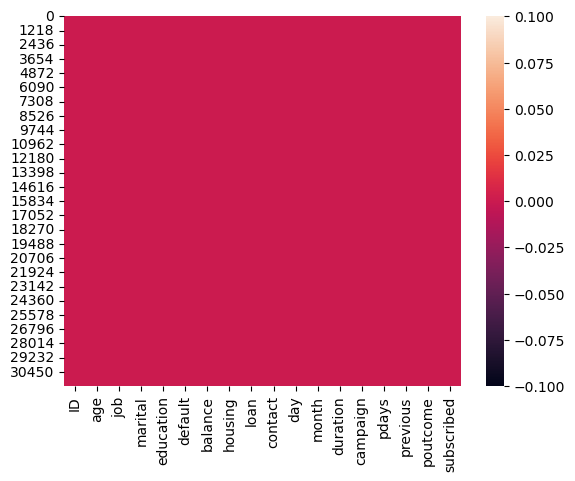

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [14]:
df.shape[0]

31647

In [15]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in df.columns.to_list() if x not in categorical]
numerical.remove('subscribed')
numerical.remove('ID')

In [16]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

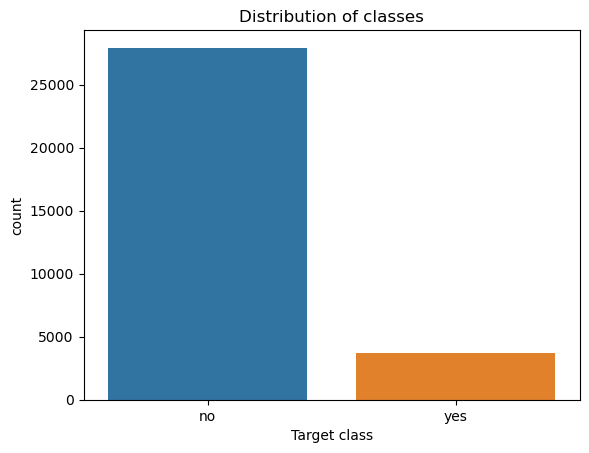

In [17]:
from matplotlib import pyplot as plt
sns.countplot(x=df['subscribed'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [18]:
df.subscribed.value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

Observation:
Our dataset is highly imbalanced.

# Data Analysis

pdays

Text(0.5, 0, 'y: target variable')

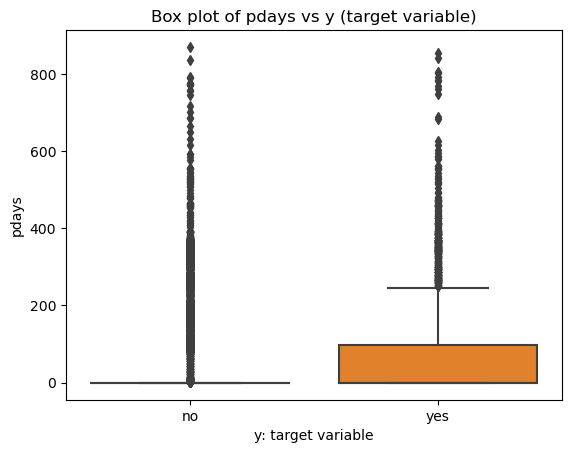

In [19]:
sns.boxplot(y=df['pdays'], x=df['subscribed'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

In [20]:
df.pdays.describe()

count    31647.000000
mean        39.576042
std         99.317592
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [21]:
for x in range(95, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, df.pdays.quantile(x/100)))
iqr = df.pdays.quantile(0.75) - df.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than equal to 313.0
96% of pdays are less than equal to 336.0
97% of pdays are less than equal to 348.0
98% of pdays are less than equal to 358.0
99% of pdays are less than equal to 370.0
100% of pdays are less than equal to 871.0
IQR 0.0


# Observation:

The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.
75% clients contacted through campaign are not previously contacted.
Mean of pdays is 40.20
There are outliers as we can see from boxplot.

Text(0.5, 0, 'y:target variable')

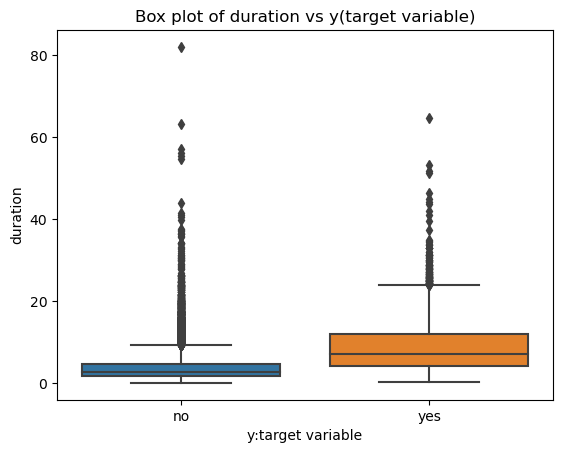

In [22]:
# converting call duration from seconds to minute
df['duration'] = df['duration']/60
sns.boxplot(y=df['duration'], x=df['subscribed'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

In [23]:
df.duration.describe()

count    31647.000000
mean         4.301892
std          4.285316
min          0.000000
25%          1.733333
50%          3.000000
75%          5.308333
max         81.966667
Name: duration, dtype: float64

In [24]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, df.duration.quantile(x/100)))
iqr = df.duration.quantile(0.75) - df.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 12.533333333333333
96% of calls have duration less than equal to 13.716666666666667
97% of calls have duration less than equal to 15.183333333333334
98% of calls have duration less than equal to 17.433333333333334
99% of calls have duration less than equal to 20.983333333333334
100% of calls have duration less than equal to 81.96666666666667
IQR 3.575


# Observation:

The attribute duration seems to be important feature as there is a clear distinction in quartile ranges of duration for target variable yes and no.
75% call duration are less than or equal to 5.32
duration have a mean of 4.30 and standard-deviation 4.29
There are outliers points in duration.

previous

Text(0.5, 0, 'y:target variable')

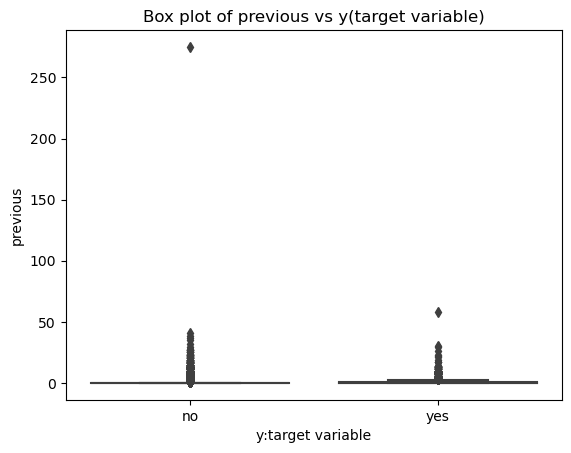

In [25]:
sns.boxplot(y=df['previous'], x=df['subscribed'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

In [26]:
df.previous.describe()

count    31647.000000
mean         0.574272
std          2.422529
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [27]:
for x in range(95, 101 , 1):
    print("{}% of previous values less than equal to {}".format(x, df.previous.quantile(x/100)))
iqr = df.previous.quantile(0.75) - df.previous.quantile(0.25)
print('IQR {}'.format(iqr))

95% of previous values less than equal to 3.0
96% of previous values less than equal to 4.0
97% of previous values less than equal to 5.0
98% of previous values less than equal to 6.0
99% of previous values less than equal to 9.0
100% of previous values less than equal to 275.0
IQR 0.0


Observation:

75% of previous values equal 0 and 99% values <= 8.90
duration have a mean of 0.58 and standard-deviation 2.30
There are outliers points in duration.

Text(0.5, 0, 'subscribed:target variable')

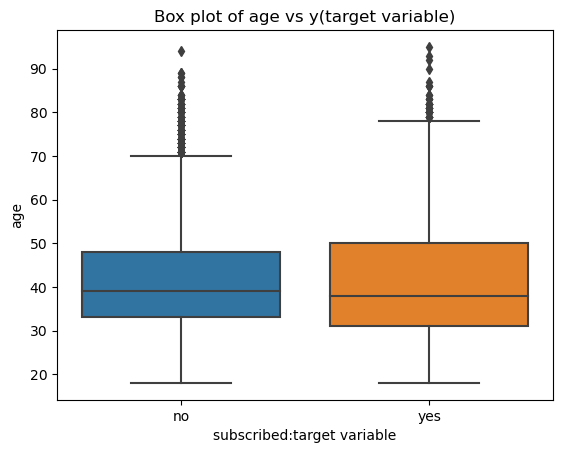

In [28]:
sns.boxplot(y=df['age'], x=df['subscribed'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('subscribed:target variable')

In [29]:
df.age.describe()

count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [30]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, df.age.quantile(x/100)))
iqr = df.age.quantile(0.75) - df.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [31]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [32]:
count_age_response_pct = pd.crosstab(df['subscribed'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

sns.countplot(x='age_group', data=data, hue='y')


In [33]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(df[df['age_group'] == 30]), df[df['age_group'] == 30].subscribed.value_counts()[1]/len(df[df['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(df[df['age_group'] == 40]), df[df['age_group'] == 40].subscribed.value_counts()[1]/len(df[df['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(df[df['age_group'] == 50]), df[df['age_group'] == 50].subscribed.value_counts()[1]/len(df[df['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(df[df['age_group'] == 60]), df[df['age_group'] == 60].subscribed.value_counts()[1]/len(df[df['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 3695, Success rate: 0.17510148849797022
Clients of age 30-45 contacted: 16973, Success rate: 0.10145525245978908
Clients of age 40-60 contacted: 9734, Success rate: 0.09656872816930347
Clients of 60+ age contacted: 1245, Success rate: 0.3261044176706827


Observation:

People with age < 30 or 60+ have higher success rate.
Only 3% of clients have age of 60+

In [34]:
df.job.value_counts()

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

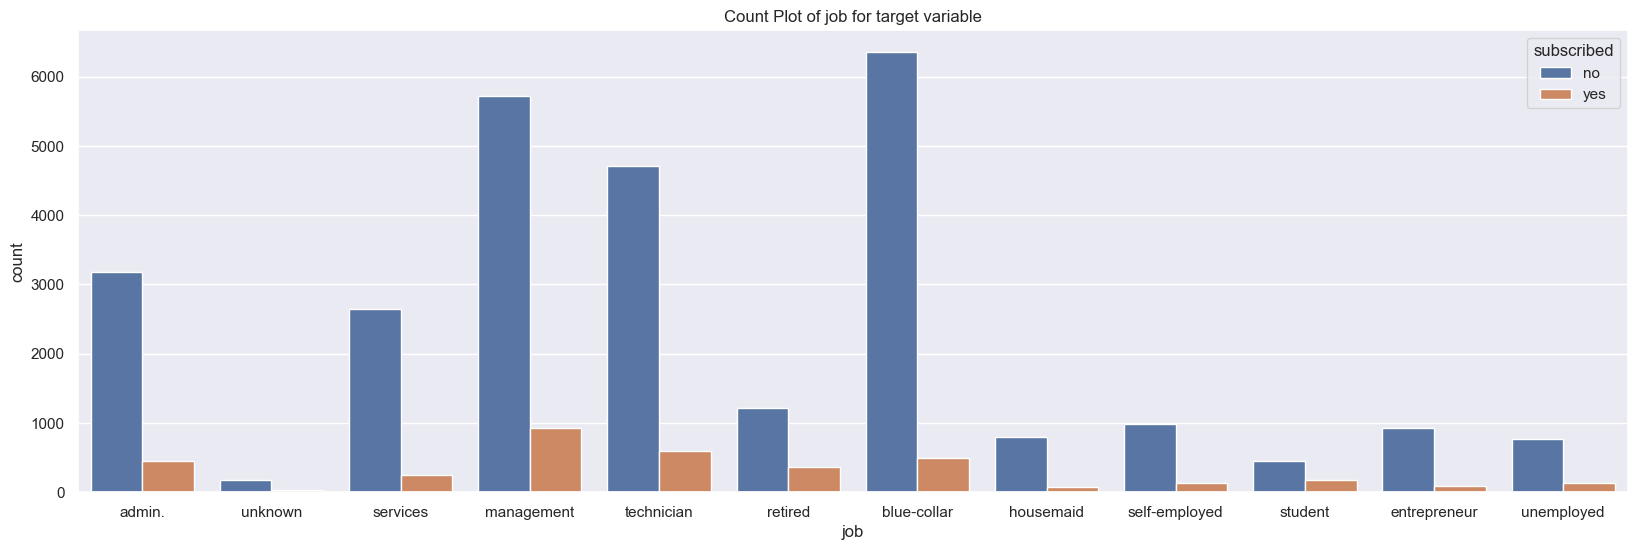

In [35]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['job'], data=df, hue=df['subscribed'])
plt.title('Count Plot of job for target variable')

In [36]:
!pip install PrettyTable

In [37]:
from prettytable import PrettyTable
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(df[df['job'] == 'blue-collar']), df[df['job'] == 'blue-collar'].subscribed.value_counts()[1]/len(df[df['job'] == 'blue-collar'])])
table.add_row(['Management', len(df[df['job'] == 'management']), df[df['job'] == 'management'].subscribed.value_counts()[1]/len(df[df['job'] == 'management'])])
table.add_row(['Technician', len(df[df['job'] == 'technician']), df[df['job'] == 'technician'].subscribed.value_counts()[1]/len(df[df['job'] == 'technician'])])
table.add_row(['Admin', len(df[df['job'] == 'admin.']), df[df['job'] == 'admin.'].subscribed.value_counts()[1]/len(df[df['job'] == 'admin.'])])
table.add_row(['Services', len(df[df['job'] == 'services']), df[df['job'] == 'services'].subscribed.value_counts()[1]/len(df[df['job'] == 'services'])])
table.add_row(['Retired', len(df[df['job'] == 'retired']), df[df['job'] == 'retired'].subscribed.value_counts()[1]/len(df[df['job'] == 'retired'])])
table.add_row(['Self-employed', len(df[df['job'] == 'self-employed']), df[df['job'] == 'self-employed'].subscribed.value_counts()[1]/len(df[df['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(df[df['job'] == 'entrepreneur']), df[df['job'] == 'entrepreneur'].subscribed.value_counts()[1]/len(df[df['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(df[df['job'] == 'unemployed']), df[df['job'] == 'unemployed'].subscribed.value_counts()[1]/len(df[df['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(df[df['job'] == 'housemaid']), df[df['job'] == 'housemaid'].subscribed.value_counts()[1]/len(df[df['job'] == 'housemaid'])])
table.add_row(['Student', len(df[df['job'] == 'student']), df[df['job'] == 'student'].subscribed.value_counts()[1]/len(df[df['job'] == 'student'])])
table.add_row(['Unknown', len(df[df['job'] == 'unknown']), df[df['job'] == 'unknown'].subscribed.value_counts()[1]/len(df[df['job'] == 'unknown'])])
print(table)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      6842     | 0.07147033031277404 |
|   Management  |      6639     | 0.13902696189185118 |
|   Technician  |      5307     | 0.11192764273600904 |
|     Admin     |      3631     | 0.12448361332966125 |
|    Services   |      2903     | 0.08749569410954185 |
|    Retired    |      1574     | 0.22998729351969505 |
| Self-employed |      1123     |  0.1246660730186999 |
|  Entrepreneur |      1008     | 0.08432539682539683 |
|   Unemployed  |      905      |  0.1425414364640884 |
|   Housemaid   |      874      | 0.09038901601830664 |
|    Student    |      635      |  0.2866141732283465 |
|    Unknown    |      206      |  0.1262135922330097 |
+---------------+---------------+---------------------+


Observation:

Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
Success rate is highest for student

# poutcome

In [38]:
df.poutcome.value_counts()

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

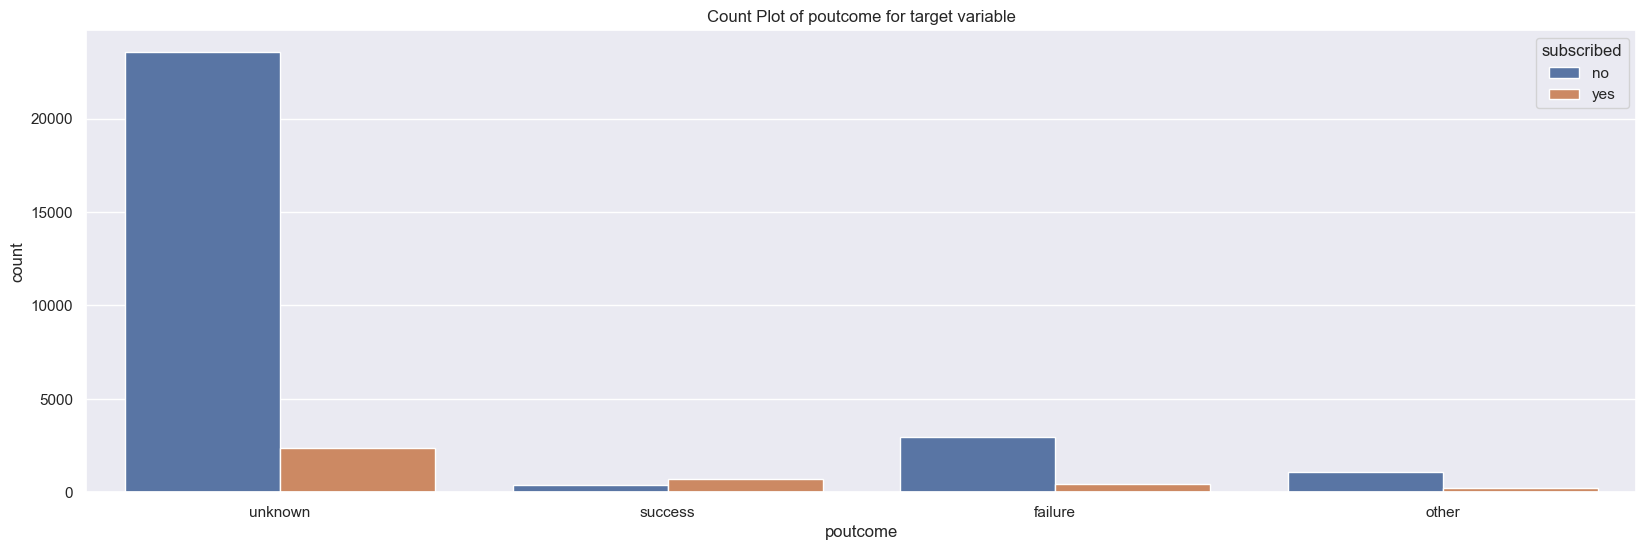

In [39]:
sns.countplot(x=df['poutcome'], data=df, hue=df['subscribed'])
plt.title('Count Plot of poutcome for target variable')

In [40]:
df.education.value_counts()

education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable subscribed')

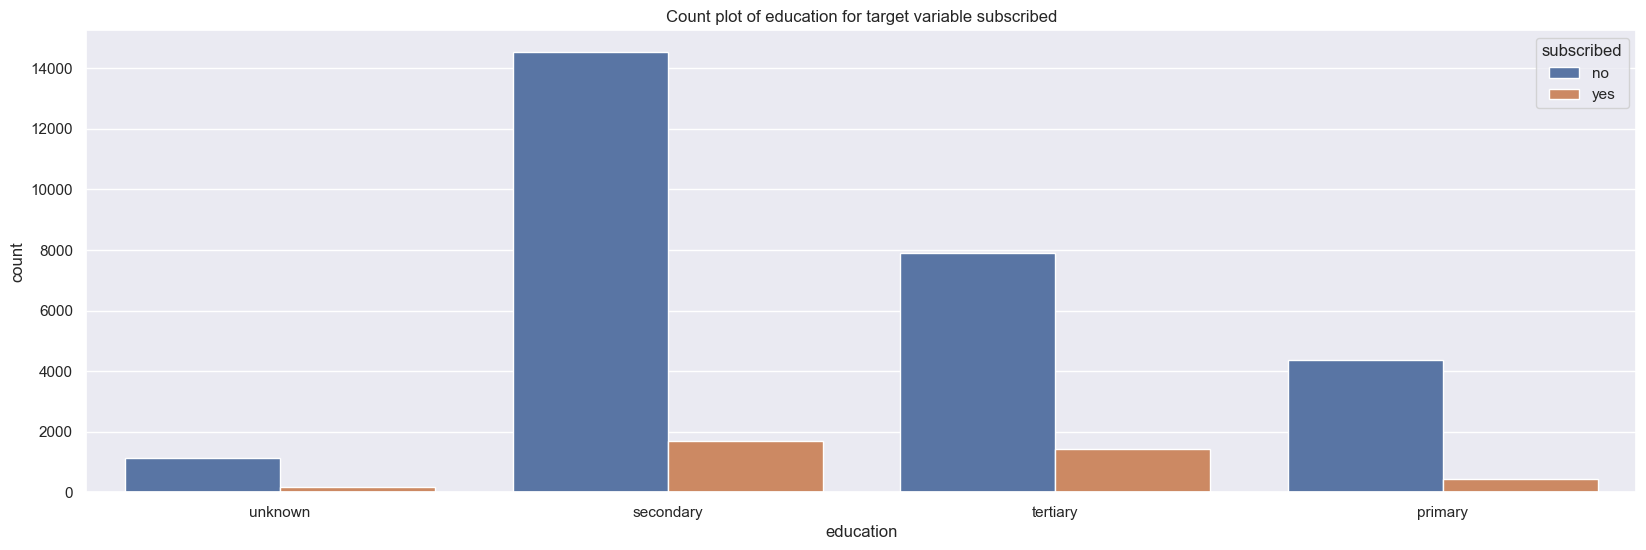

In [41]:
sns.countplot(x=df['education'], data=df, hue=df['subscribed'])
plt.title('Count plot of education for target variable subscribed')

Observation:

Most of the people who are contacted have tertiray or secondary education.

# default

In [42]:
df.default.value_counts()

default
no     31062
yes      585
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of default for target variable subscribed')

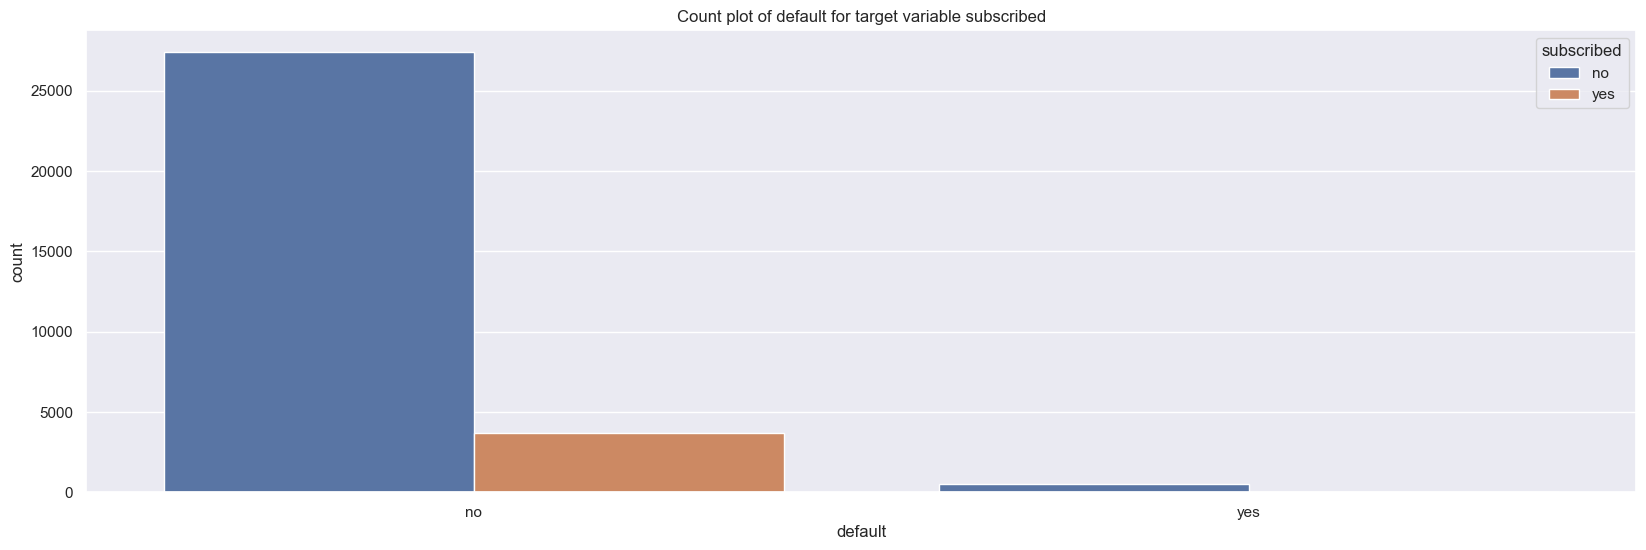

In [43]:
sns.countplot(x=df['default'], data=df, hue=df['subscribed'])
plt.title('Count plot of default for target variable subscribed')

In [44]:
df[df['default'] == 'yes'].subscribed.count()

585

Observation:
Very few clients are contacted who are defaulter,

# Laon

In [45]:
df.loan.value_counts()

loan
no     26516
yes     5131
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of loan for target variable subscribed')

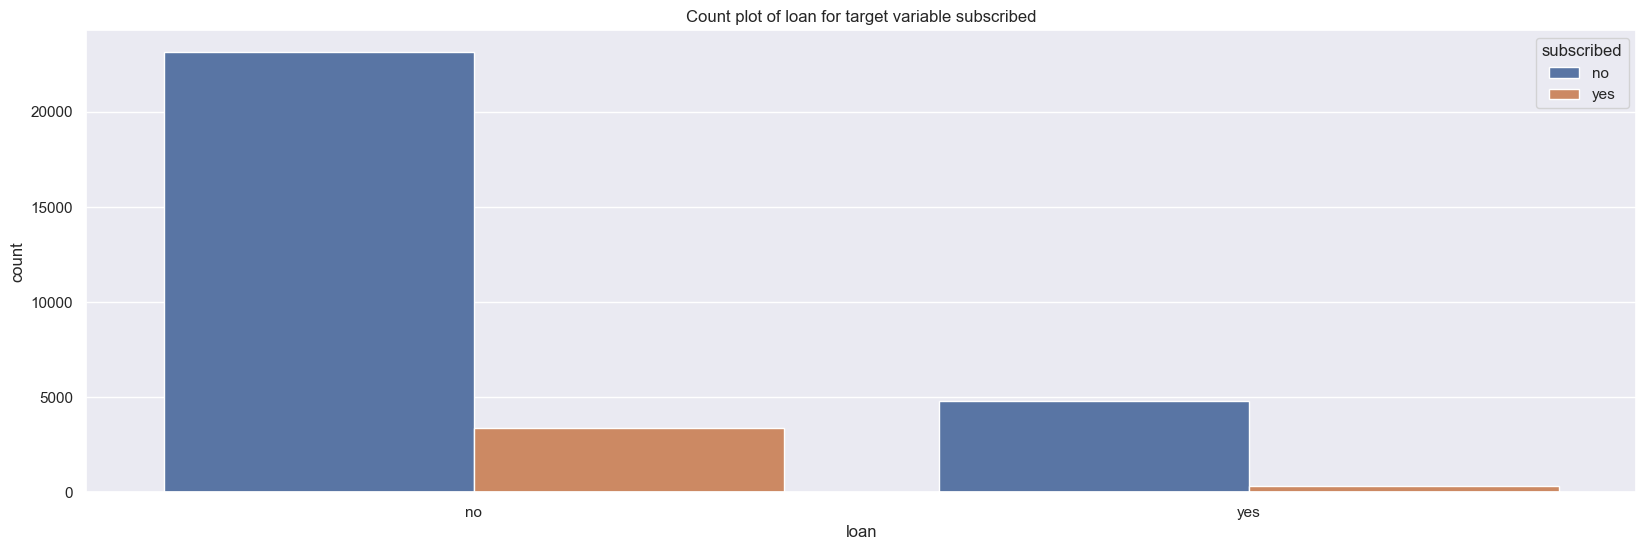

In [46]:
sns.countplot(x=df['loan'], data=df, hue=df['subscribed'])
plt.title('Count plot of loan for target variable subscribed')

Observation:

As seen for default variable, less client are contacted who have loan.

# Contact

In [47]:
df.contact.value_counts()

contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64

# Month

Text(0.5, 1.0, 'Count plot of contact for target variable subscribed')

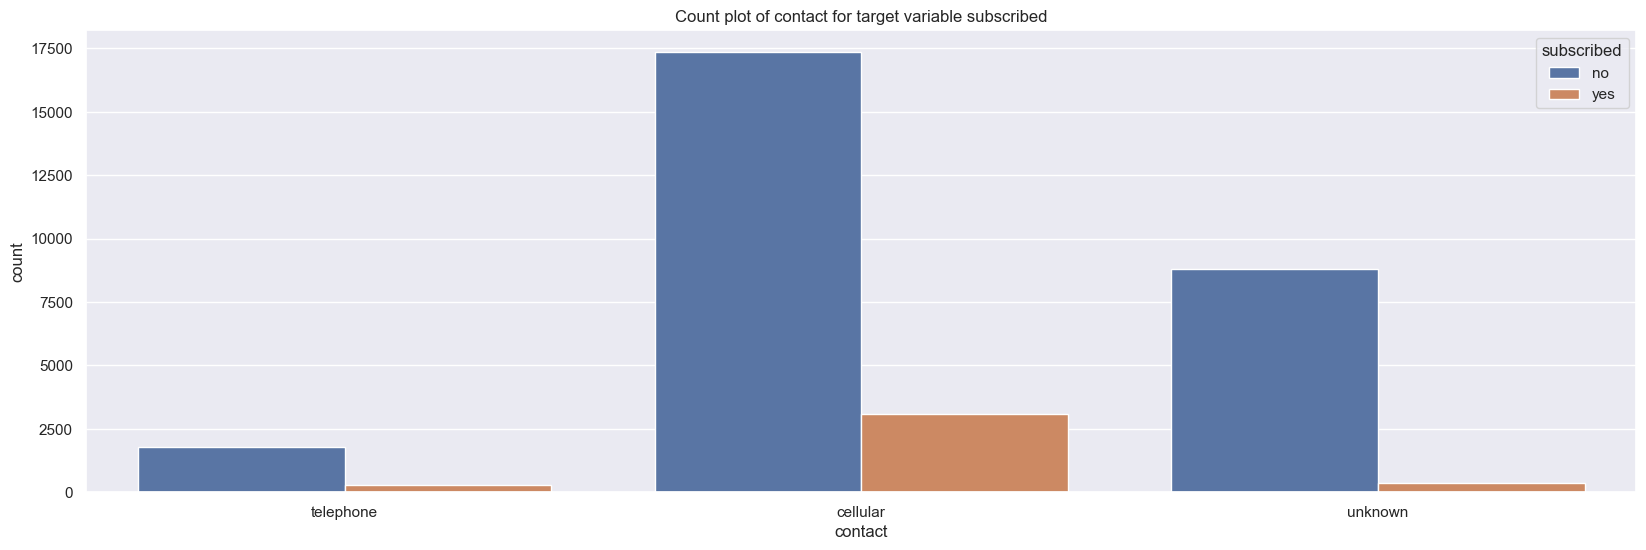

In [48]:
sns.countplot(x=df['contact'], data=df, hue=df['subscribed'])
plt.title('Count plot of contact for target variable subscribed')

Observation:
Most of the people are contacted through cellular

# Month

In [49]:
df.month.value_counts()

month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of month for target variable subscribed')

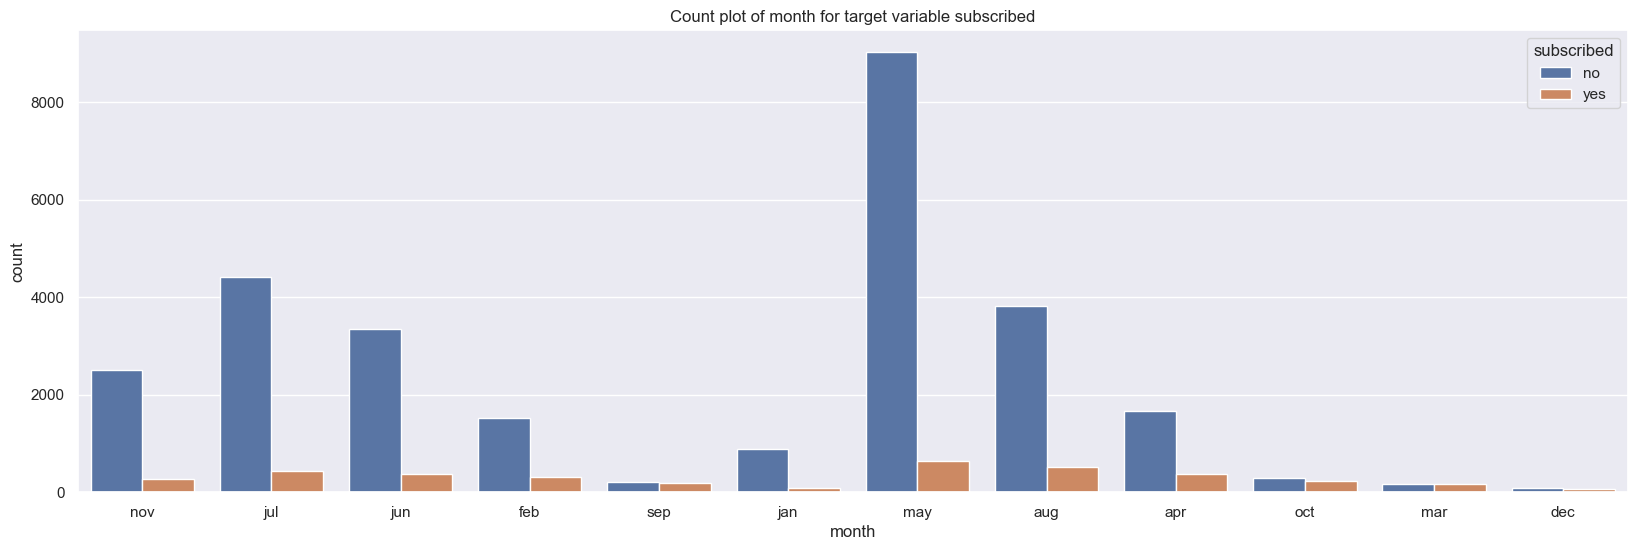

In [50]:
sns.countplot(x=df['month'], data=df, hue=df['subscribed'])
plt.title('Count plot of month for target variable subscribed')

In [51]:
df[df['month'] == 'jan'].subscribed.value_counts()

subscribed
no     880
yes     97
Name: count, dtype: int64

In [52]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(df[df['month'] == 'jan']), df[df['month'] == 'jan'].subscribed.value_counts()[1]/len(df[df['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(df[df['month'] == 'feb']), df[df['month'] == 'feb'].subscribed.value_counts()[1]/len(df[df['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(df[df['month'] == 'mar']), df[df['month'] == 'mar'].subscribed.value_counts()[1]/len(df[df['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(df[df['month'] == 'apr']), df[df['month'] == 'apr'].subscribed.value_counts()[1]/len(df[df['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(df[df['month'] == 'may']), df[df['month'] == 'may'].subscribed.value_counts()[1]/len(df[df['month'] == 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(df[df['month'] == 'jun']), df[df['month'] == 'jun'].subscribed.value_counts()[1]/len(df[df['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(df[df['month'] == 'jul'    ]), df[df['month'] == 'jul'].subscribed.value_counts()[1]/len(df[df['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(df[df['month'] == 'aug']), df[df['month'] == 'aug'].subscribed.value_counts()[1]/len(df[df['month'] == 'aug'])))
print('Clients contacted in September: {}, Success rate: {}'.format(len(df[df['month'] == 'sep']), df[df['month'] == 'sep'].subscribed.value_counts()[1]/len(df[df['month'] == 'sep'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(df[df['month'] == 'oct']), df[df['month'] == 'oct'].subscribed.value_counts()[1]/len(df[df['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(df[df['month'] == 'nov']), df[df['month'] == 'nov'].subscribed.value_counts()[1]/len(df[df['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(df[df['month'] == 'dec']), df[df['month'] == 'dec'].subscribed.value_counts()[1]/len(df[df['month'] == 'dec'])))

Success rate and total clients contacted for different months:
Clients contacted in January: 977, Success rate: 0.0992835209825998
Clients contacted in February: 1827, Success rate: 0.16694033935413247
Clients contacted in March: 342, Success rate: 0.49122807017543857
Clients contacted in April: 2055, Success rate: 0.18686131386861313
Clients contacted in May: 9669, Success rate: 0.0671217292377702
Clients contacted in June: 3738, Success rate: 0.10246120920278223
Clients contacted in July: 4844, Success rate: 0.09104046242774566
Clients contacted in August: 4333, Success rate: 0.12000923147934456
Clients contacted in September: 410, Success rate: 0.4658536585365854
Clients contacted in October: 512, Success rate: 0.4375
Clients contacted in November: 2783, Success rate: 0.09881422924901186
Clients contacted in December: 157, Success rate: 0.4585987261146497


Observation:

Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
March have highest success rate.

# Pairplot

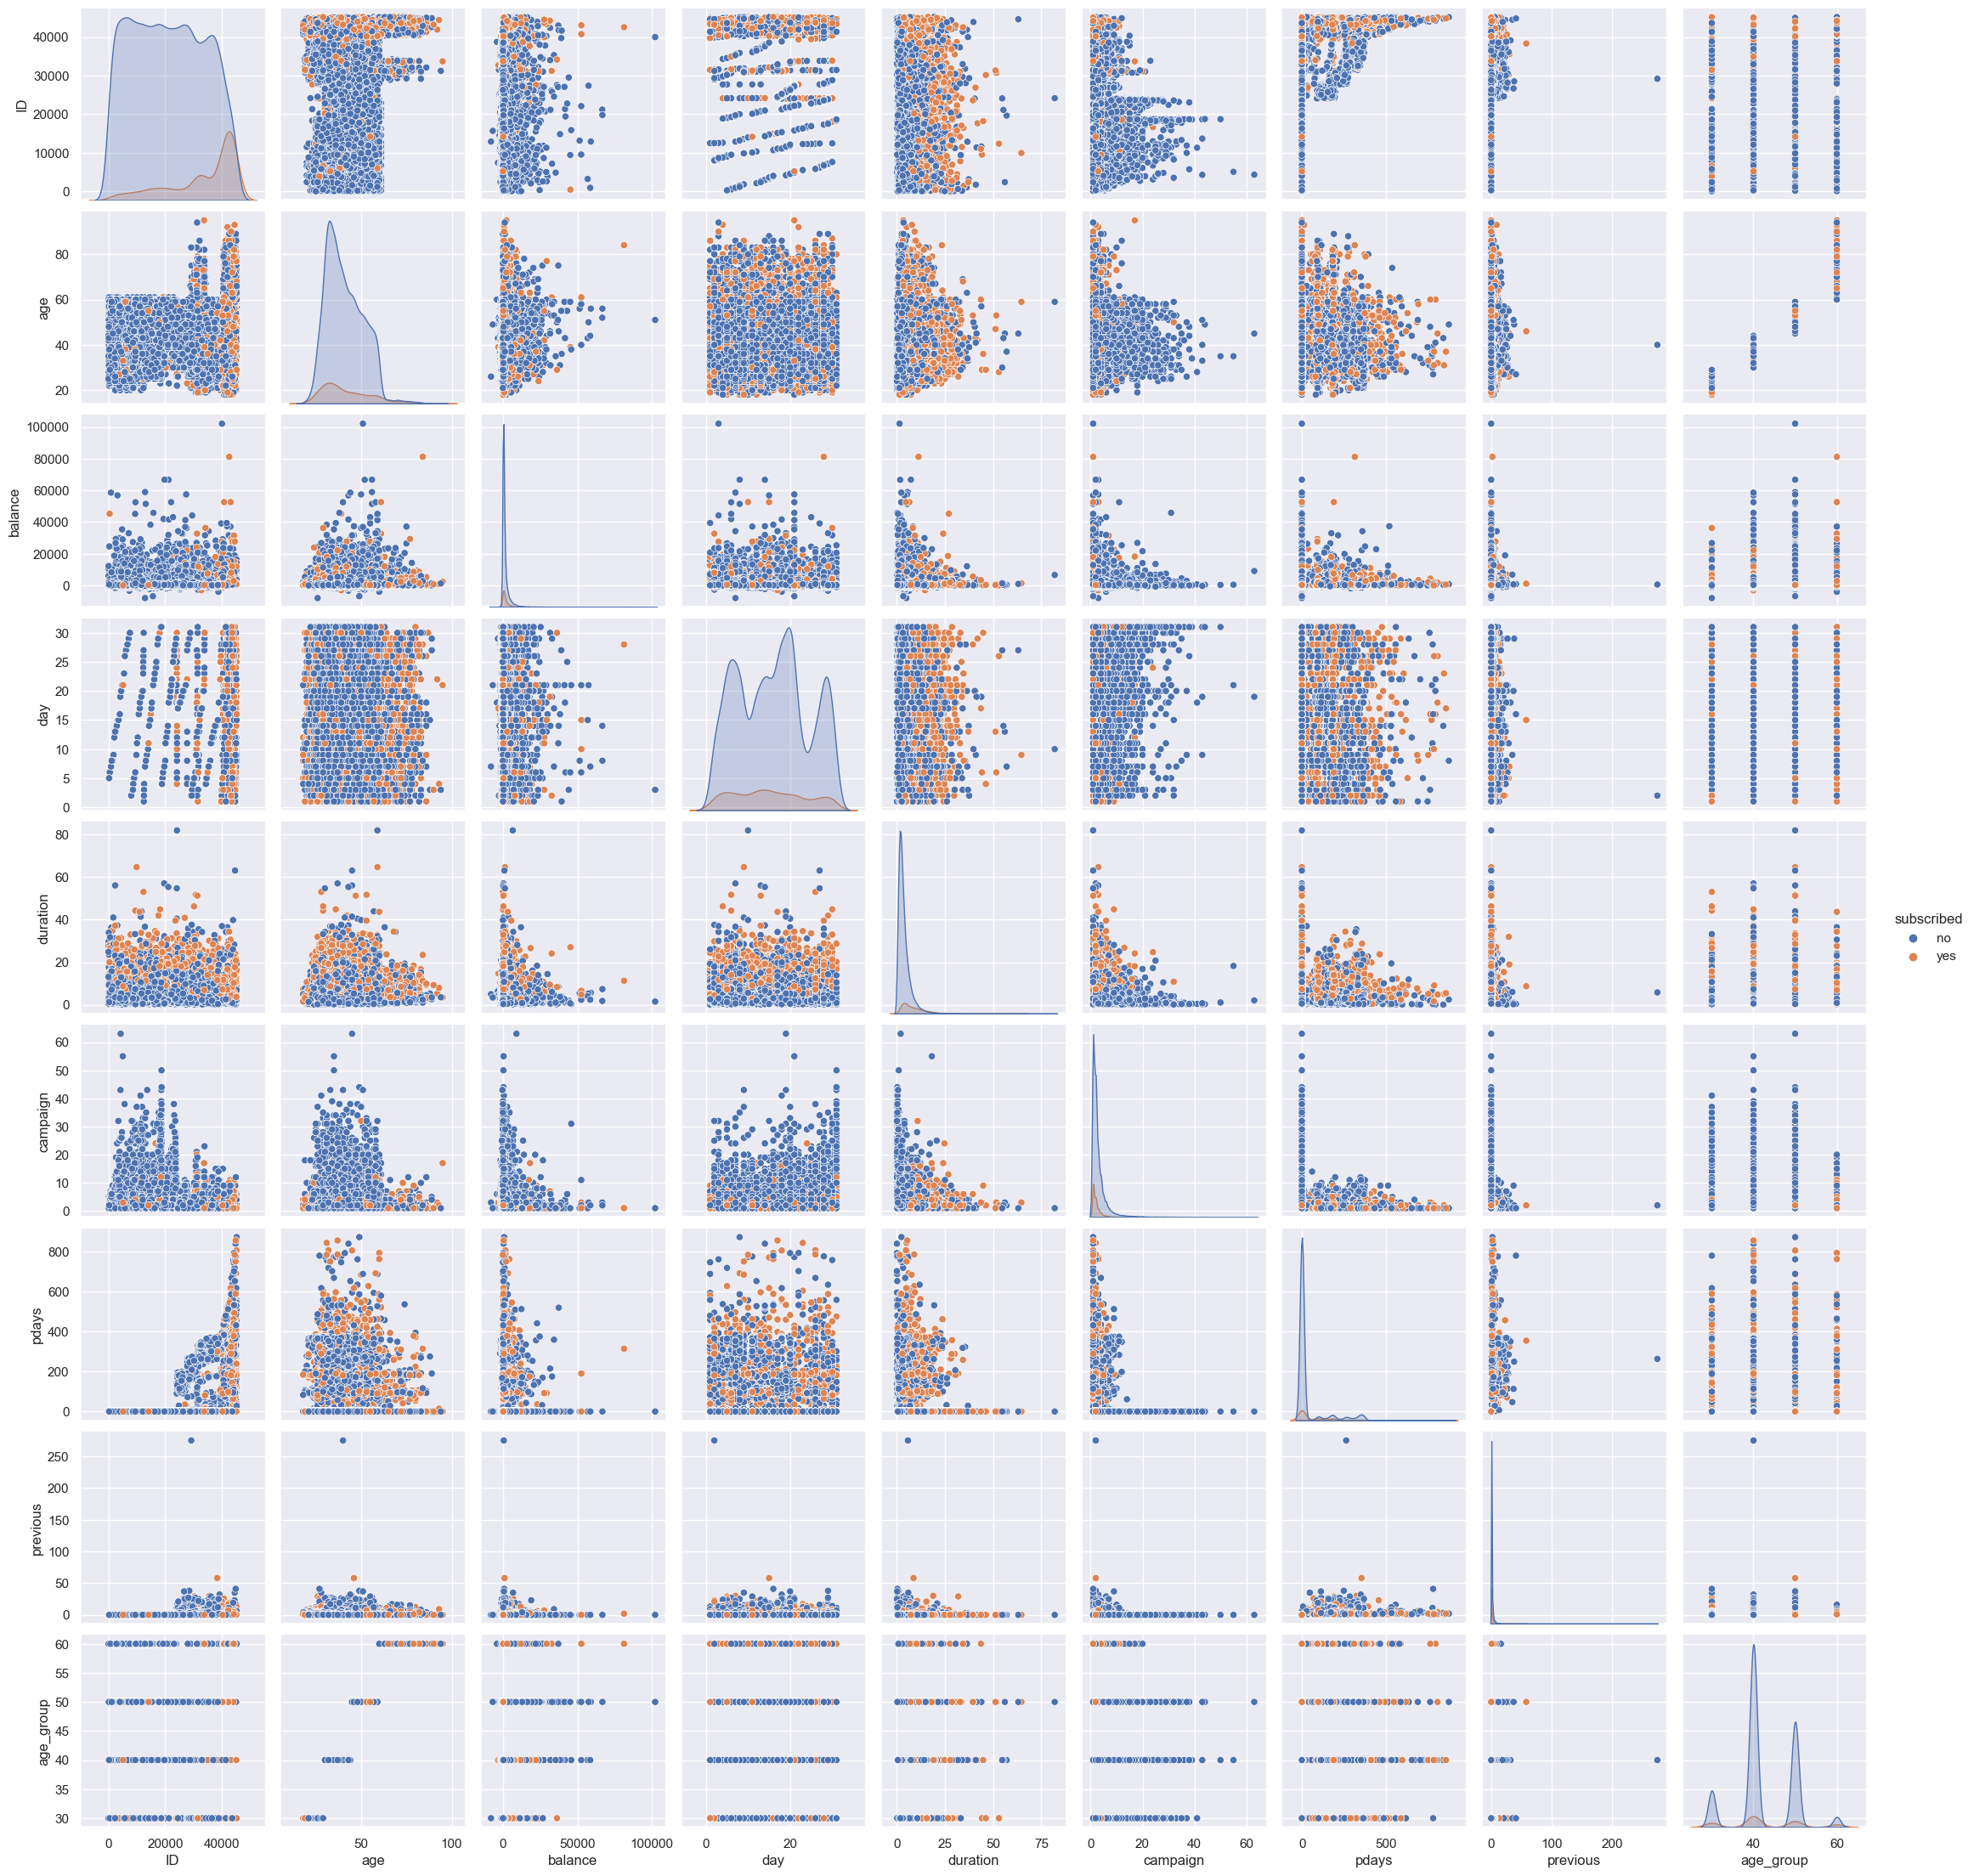

In [53]:
#data.drop('age_group', axis=1, inplace=True)
sns.pairplot(df, hue='subscribed')

Observation:

For most of the variables our pair plot is overlapping a lot.
Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

Correlation matrix of numerical features

In [54]:
corr_df = df[numerical + ['subscribed']]
corr_df

,age,balance,day,duration,campaign,pdays,previous,subscribed
0,56,1933,19,0.733333,2,-1,0,no
1,31,3,20,1.516667,2,-1,0,no
2,27,891,18,4.000000,1,-1,0,no
3,57,3287,22,14.450000,1,84,3,yes
4,31,119,4,6.333333,1,-1,0,no
...,...,...,...,...,...,...,...,...
31642,29,0,12,1.933333,2,-1,0,no
31643,53,380,5,7.300000,2,-1,0,yes
31644,32,312,7,0.616667,3,-1,0,no
31645,57,225,15,0.366667,7,337,12,no


Observation:

Over numerical features have very less correlation between them.
pdays and previous have higher correlation
duration have a higher correlation with our target variable


Outlier detection for numerical attributes using IQR

In [55]:
# creating new data frame of numerical columns 
df_numerical = df[numerical]
print('Shape of numerical dataframe {}'.format(df_numerical.shape))
df_numerical.head()


Shape of numerical dataframe (31647, 7)


,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,0.733333,2,-1,0
1,31,3,20,1.516667,2,-1,0
2,27,891,18,4.000000,1,-1,0
3,57,3287,22,14.450000,1,84,3
4,31,119,4,6.333333,1,-1,0


In [56]:
q3 = df_numerical.quantile(0.75)
q1 = df_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.000
balance     1358.000
day           13.000
duration       3.575
campaign       2.000
pdays          0.000
previous       0.000
dtype: float64


In [57]:
df_out = df[~((df_numerical < (q1 - 1.5 * iqr)) |(df_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - df_out.shape[0]))

11848 points are outliers based on IQR


In [58]:
df.shape

(31647, 19)

# Preprocessing

Train Test Split

In [59]:
df.replace(to_replace={'subscribed':'yes'}, value=1, inplace=True)
df.replace(to_replace={'subscribed':'no'}, value=0, inplace=True)

In [60]:
# Convert the columns into categorical variables
df1 = df.copy()
df1['job'] = df1['job'].astype('category').cat.codes
df1['marital'] = df1['marital'].astype('category').cat.codes
df1['education'] = df1['education'].astype('category').cat.codes
df1['contact'] = df1['contact'].astype('category').cat.codes
df1['poutcome'] = df1['poutcome'].astype('category').cat.codes
df1['month'] = df1['month'].astype('category').cat.codes
df1['default'] = df1['default'].astype('category').cat.codes
df1['loan'] = df1['loan'].astype('category').cat.codes
df1['housing'] = df1['housing'].astype('category').cat.codes

In [61]:
y = df['subscribed']
x_train, x_test, y_train, y_test = train_test_split(df.drop(['subscribed'], axis=1), y, test_size=0.20, random_state=42)

In [62]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (25317, 18) (25317,)
Test data shape (6330, 18) (6330,)


In [63]:
#Encoding categories
vectorizer = CountVectorizer(vocabulary=x_train.poutcome.unique())
x_train_poutcome = vectorizer.fit_transform(x_train.poutcome)
x_test_poutcome = vectorizer.transform(x_test.poutcome)

In [64]:
vectorizer = CountVectorizer(vocabulary=x_train.contact.unique())
x_train_contact = vectorizer.fit_transform(x_train.contact)
x_test_contact = vectorizer.transform(x_test.contact)

In [65]:
vectorizer = CountVectorizer(vocabulary=x_train.month.unique())
x_train_month = vectorizer.fit_transform(x_train.month)
x_test_month = vectorizer.transform(x_test.month)

In [66]:
vectorizer = CountVectorizer(vocabulary=x_train.housing.unique())
x_train_housing = vectorizer.fit_transform(x_train.housing)
x_test_housing = vectorizer.transform(x_test.housing)

In [67]:
from scipy.sparse import hstack

train = hstack((x_train_contact, x_train_poutcome, x_train_month, x_train_housing)).tocsr()

test = hstack((x_test_contact, x_test_poutcome, x_test_month, x_test_housing)).tocsr()

# Machine Learning Algorithms and Testing Process

In [68]:
# dictionary to store accuracy and roc score for each model
score = {}

# Support Vector Classifier

In [69]:
#Hyperparameter tuning SVM
params = {'alpha': [10**i for i in range(-4, 5)]}

model = SGDClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'alpha': 0.01}
Best score: 0.7394771815744102


**************************************************
Train AUC: 0.731
Test AUC: 0.723
**************************************************
Train Accuracy: 0.779
Test Accuracy: 0.779


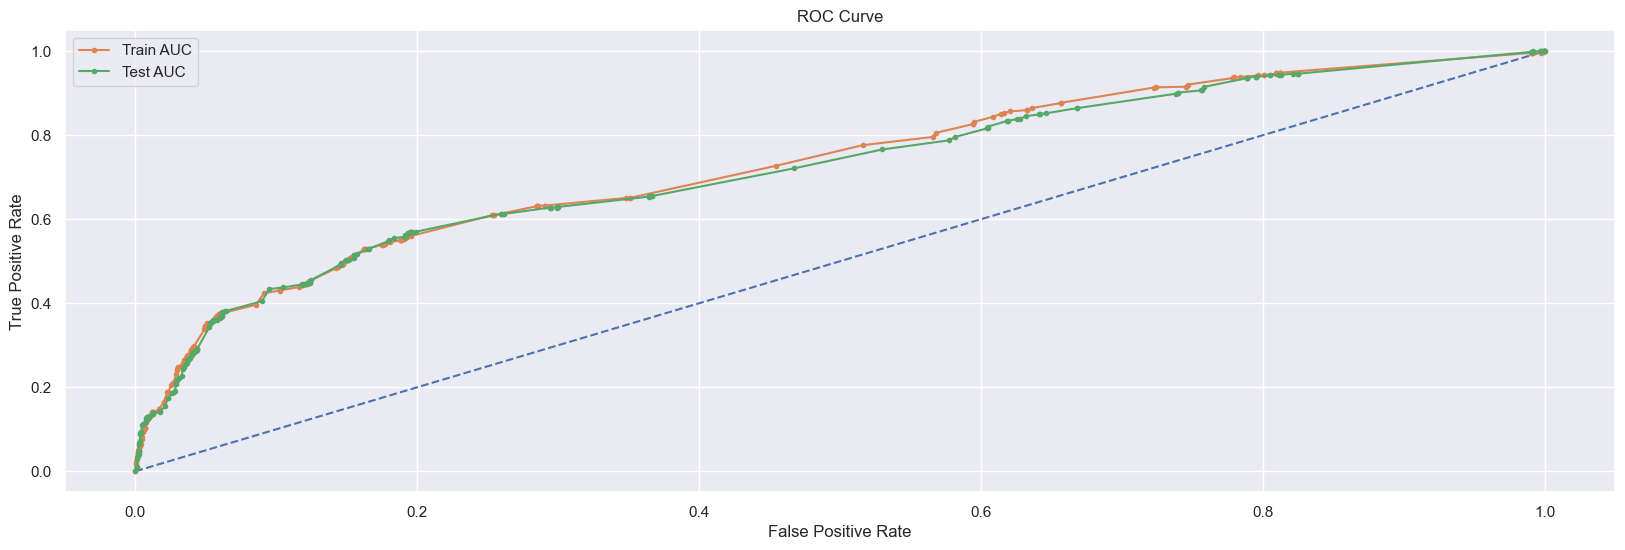

In [70]:
#Training SVM with best hyperparameters
model = SGDClassifier(alpha=0.0001, class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)
y_probs_train = model.decision_function(train)
y_probs_test = model.decision_function(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['SVM'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Random Forest Classifier

In [71]:
#Hyperparameter tuning Random Forest
params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 500, 'max_depth': 10}
Best score: 0.7637844690660828


In [72]:
model = RandomForestClassifier(n_estimators=250, max_depth=25, class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)
y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest'] = [test_auc, test_acc]


**************************************************
Train AUC: 0.777
Test AUC: 0.759
**************************************************
Train Accuracy: 0.842
Test Accuracy: 0.836


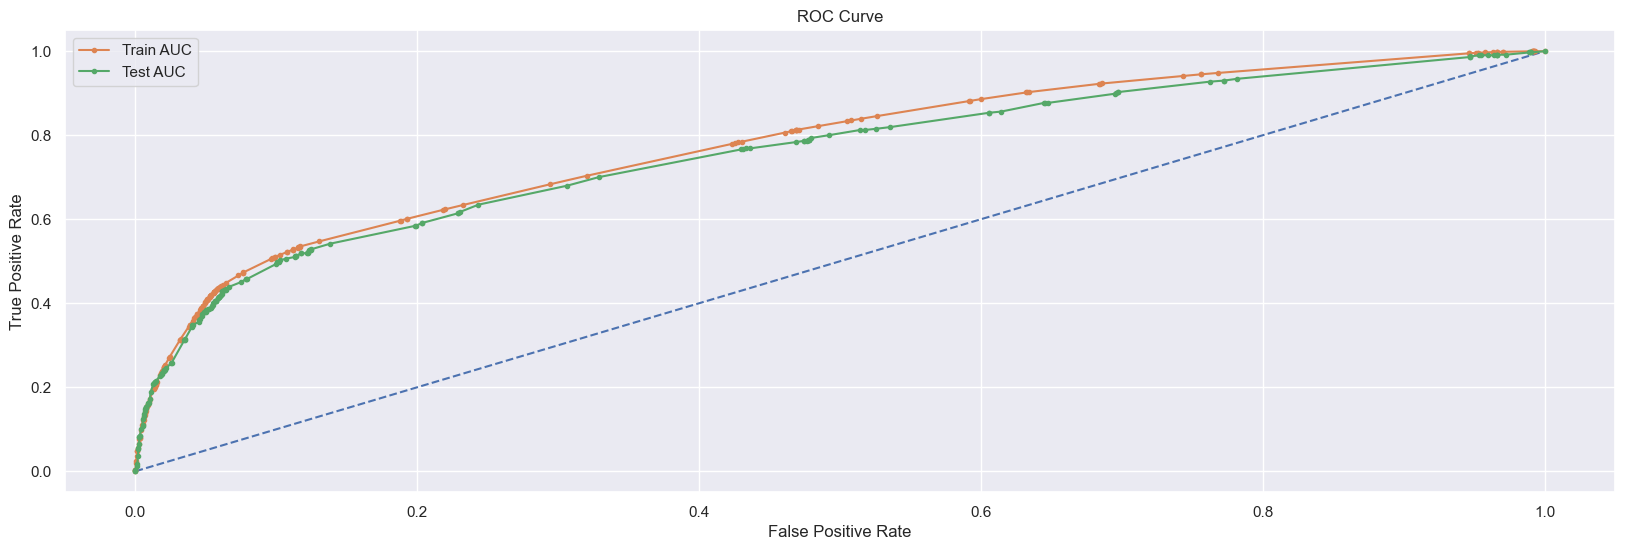

In [73]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Conclusion
Out of all above models:
Random Forest Classifier is giving best result with:

Train Accuracy: 0.843
Test Accuracy: 0.836

exit....